In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# train_df.groupby(["Additional_Info"]).describe().T

In [5]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Study the training data

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train_df.groupby(["Additional_Info"]).describe().T

Additional_Info  1 Long layover  1 Short layover  2 Long layover  \
Price count           19.000000              1.0             1.0   
      mean         22109.631579          26743.0         26480.0   
      std           8040.051155              NaN             NaN   
      min           7744.000000          26743.0         26480.0   
      25%          14673.000000          26743.0         26480.0   
      50%          25735.000000          26743.0         26480.0   
      75%          27992.000000          26743.0         26480.0   
      max          31825.000000          26743.0         26480.0   

Additional_Info  Business class  Change airports  In-flight meal not included  \
Price count            4.000000         7.000000                  1982.000000   
      mean         56811.250000     16800.714286                  9471.834511   
      std          21381.667044      4449.728371                  2812.043362   
      min          28097.000000     13366.000000                  1840.000000   
      25%          49931.000000     13940.500000                  7757.000000   
      50%          59818.000000     15119.000000                 10262.000000   
      75%          66698.250000     17573.500000                 10844.000000   
      max          79512.000000     26092.000000                 19644.000000   

Additional_Info      No Info  No check-in baggage included       No info  \
Price count         3.000000                    320.000000   8345.000000   
      mean       8044.666667                   3645.156250   9141.320192   
      std         119.181934                    865.712619   4714.100152   
      min        7917.000000                   1965.000000   1759.000000   
      25%        7990.500000                   3543.000000   5224.000000   
      50%        8064.000000                   3841.000000   8016.000000   
      75%        8108.500000                   3859.000000  12970.000000   
      max        8153.000000                   6356.000000  54826.000000   

Additional_Info  Red-eye flight  
Price count                 1.0  
      mean              10873.0  
      std                   NaN  
      min               10873.0  
      25%               10873.0  
      50%               10873.0  
      75%               10873.0  
      max               10873.0

In [9]:
train_df.groupby('Airline').describe().T

Airline          Air Asia     Air India         GoAir        IndiGo  \
Price count    319.000000   1752.000000    194.000000   2053.000000   
      mean    5590.260188   9611.210616   5861.056701   5673.682903   
      std     2027.362290   3900.952942   2703.585767   2264.142168   
      min     3383.000000   2050.000000   3398.000000   2227.000000   
      25%     4282.000000   6896.000000   3898.000000   4226.000000   
      50%     5162.000000   9443.000000   5135.000000   5000.000000   
      75%     6451.000000  12219.000000   6811.250000   6494.000000   
      max    13774.000000  31945.000000  22794.000000  22153.000000   

Airline       Jet Airways  Jet Airways Business  Multiple carriers  \
Price count   3849.000000              6.000000        1196.000000   
      mean   11643.923357          58358.666667       10902.678094   
      std     4258.940578          11667.596748        3721.234997   
      min     1840.000000          46490.000000        5797.000000   
      25%     9134.000000          52243.000000        7723.000000   
      50%    11467.000000          54747.000000       10197.000000   
      75%    14151.000000          61122.500000       13587.000000   
      max    54826.000000          79512.000000       36983.000000   

Airline      Multiple carriers Premium economy      SpiceJet  Trujet  \
Price count                          13.000000    818.000000     1.0   
      mean                        11418.846154   4338.284841  4140.0   
      std                          1717.153936   1849.922514     NaN   
      min                          9845.000000   1759.000000  4140.0   
      25%                         10161.000000   3574.500000  4140.0   
      50%                         11269.000000   3873.000000  4140.0   
      75%                         11269.000000   4760.000000  4140.0   
      max                         14629.000000  23267.000000  4140.0   

Airline           Vistara  Vistara Premium economy  
Price count    479.000000                 3.000000  
      mean    7796.348643              8962.333333  
      std     2914.298578              2915.405518  
      min     3687.000000              5969.000000  
      25%     5403.000000              7547.000000  
      50%     7980.000000              9125.000000  
      75%     9345.000000             10459.000000  
      max    21730.000000             11793.000000

In [10]:
train_df.groupby(['Source','Destination','Airline']).describe()

Price                \
                                                         count          mean   
Source   Destination Airline                                                   
Banglore Delhi       Air Asia                             71.0   4265.577465   
                     Air India                           120.0   6045.166667   
                     GoAir                                69.0   4050.289855   
                     IndiGo                              366.0   4399.581967   
                     Jet Airways                         370.0   6412.954054   
                     SpiceJet                            137.0   4012.839416   
                     Vistara                             131.0   5042.312977   
                     Vistara Premium economy               1.0   5969.000000   
         New Delhi   Air Asia                             18.0   5791.944444   
                     Air India                           212.0  11045.575472   
                     GoAir                                24.0   7532.333333   
                     IndiGo                              157.0   7312.828025   
                     Jet Airways                         418.0  15101.272727   
                     Jet Airways Business                  4.0  62844.250000   
                     SpiceJet                             44.0   6223.727273   
                     Vistara                              54.0   8947.388889   
                     Vistara Premium economy               1.0  11793.000000   
Chennai  Kolkata     Air India                            25.0   5895.640000   
                     IndiGo                              184.0   4538.766304   
                     SpiceJet                            128.0   3993.523438   
                     Vistara                              43.0   7491.372093   
                     Vistara Premium economy               1.0   9125.000000   
Delhi    Cochin      Air Asia                             80.0   7804.175000   
                     Air India                           747.0  10000.068273   
                     GoAir                                76.0   6587.157895   
                     IndiGo                              705.0   7203.933333   
                     Jet Airways                        1586.0  12642.593317   
                     Jet Airways Business                  2.0  49387.500000   
                     Multiple carriers                  1196.0  10902.678094   
                     Multiple carriers Premium economy    13.0  11418.846154   
                     SpiceJet                             87.0   5916.356322   
                     Vistara                              45.0   6465.644444   
Kolkata  Banglore    Air Asia                            150.0   5012.320000   
                     Air India                           512.0  10357.324219   
                     GoAir                                25.0   7047.000000   
                     IndiGo                              445.0   5075.235955   
                     Jet Airways                        1256.0  11717.565287   
                     SpiceJet                            300.0   4642.883333   
                     Vistara                             183.0   9257.683060   
Mumbai   Hyderabad   Air India                           136.0   6260.051471   
                     IndiGo                              196.0   3659.816327   
                     Jet Airways                         219.0   6227.949772   
                     SpiceJet                            122.0   2511.106557   
                     Trujet                                1.0   4140.000000   
                     Vistara                              23.0  12326.521739   

                                                                               \
                                                                 std      min   
Source   Destination Airline                          

In [11]:
train_df.groupby(['Source','Destination','Date_of_Journey']).describe().head(10)

Price                                    \
                                     count         mean          std     min   
Source   Destination Date_of_Journey                                           
Banglore Delhi       1/04/2019        40.0  5038.700000  1158.628106  3573.0   
                     1/05/2019        42.0  5040.666667  1156.266862  3898.0   
                     1/06/2019        47.0  5475.319149  1588.356001  3419.0   
                     12/04/2019       42.0  5576.714286   959.676452  4282.0   
                     12/05/2019       48.0  4991.145833  1203.464237  3257.0   
                     12/06/2019       44.0  5255.727273  1467.850879  3383.0   
                     15/04/2019       41.0  5109.341463  1031.326054  3898.0   
                     15/05/2019       46.0  4718.913043  1341.389592  3257.0   
                     15/06/2019       39.0  5520.435897  1647.407897  3383.0   
                     18/04/2019       40.0  5447.675000   964.843614  4282.0   

                                                                        
                                          25%     50%      75%     max  
Source   Destination Date_of_Journey                                    
Banglore Delhi       1/04/2019        4239.00  4567.5  5403.00  7229.0  
                     1/05/2019        4128.25  4668.0  5890.25  7229.0  
                     1/06/2019        3957.00  4823.0  7229.00  8016.0  
                     12/04/2019       4898.00  5300.5  5911.00  7229.0  
                     12/05/2019       4219.00  4668.0  5280.50  7229.0  
                     12/06/2019       4225.00  4823.0  5769.00  8016.0  
                     15/04/2019       4423.00  4823.0  5403.00  7229.0  
                     15/05/2019       3704.50  4300.5  5118.00  7229.0  
                     15/06/2019       3957.00  4878.0  7229.00  8016.0  
                     18/04/2019       4591.00  5213.0  5790.75  7229.0

In [12]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_df.dropna(inplace=True)

In [14]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
print('Airline',train_df['Airline'].unique())
print('Total Stops',train_df['Total_Stops'].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Total Stops ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


### Study the test data

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [17]:
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Data Preprocessing

In [18]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [19]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [20]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [21]:
train_df.apply(lambda x:x.unique())

Airline            [IndiGo, Air India, Jet Airways, SpiceJet, Mul...
Date_of_Journey    [24/03/2019, 1/05/2019, 9/06/2019, 12/05/2019,...
Source                   [Banglore, Kolkata, Delhi, Chennai, Mumbai]
Destination        [New Delhi, Banglore, Cochin, Kolkata, Delhi, ...
Route              [BLR → DEL, CCU → IXR → BBI → BLR, DEL → LKO →...
Dep_Time           [22:20, 05:50, 09:25, 18:05, 16:50, 09:00, 18:...
Arrival_Time       [01:10 22 Mar, 13:15, 04:25 10 Jun, 23:30, 21:...
Duration           [2h 50m, 7h 25m, 19h, 5h 25m, 4h 45m, 2h 25m, ...
Total_Stops            [non-stop, 2 stops, 1 stop, 3 stops, 4 stops]
Additional_Info    [No info, In-flight meal not included, No chec...
Price              [3897, 7662, 13882, 6218, 13302, 3873, 11087, ...
dtype: object

In [22]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [23]:
train_df['Arrival_Time'] = train_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
train_df['Total_Stops'] = train_df['Total_Stops'].replace('non-stop','0 stop') 
train_df['Total_Stops'] = train_df['Total_Stops'].fillna('1 stop')

In [24]:
#Date of journey is of dtype Object so preprocessing it.

train_df['Date'] = train_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
train_df['Month'] = train_df['Date_of_Journey'].apply(lambda x:x.split('/')[1]) 
train_df['Year'] = train_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,06,2019


In [25]:
train_df['Dep_hour'] = train_df['Dep_Time'].apply(lambda x:x.split(':')[0])
train_df['Dep_minute'] = train_df['Dep_Time'].apply(lambda x:x.split(':')[1])
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,03,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50


In [26]:
train_df['Arrival_hour'] = train_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
train_df['Arrival_minute'] = train_df['Arrival_Time'].apply(lambda x:x.split(':')[1])
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15


In [27]:
train_df['Total_Stops'] = train_df['Total_Stops'].apply(lambda x:x.split(' ')[0])
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,03,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,06,2019,09,25,04,25


In [28]:
train_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [29]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,05,2019,05,50,13,15


In [30]:
train_df.groupby(['Route']).describe().T
max(train_df['Total_Stops'])

'4'

In [31]:
train_df['Route_1'] = pd.Series(train_df['Route'].str.split('→ ')[0])
train_df['Route_2'] = pd.Series(train_df['Route'].str.split('→ ')[1])
train_df['Route_3'] = pd.Series(train_df['Route'].str.split('→ ')[2])
train_df['Route_4'] = pd.Series(train_df['Route'].str.split('→ ')[3])
train_df['Route_5'] = pd.Series(train_df['Route'].str.split('→ ')[4])
train_df.drop('Route',axis=1,inplace=True)
train_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,03,2019,22,20,01,10,BLR,CCU,DEL,CCU,BLR
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,05,2019,05,50,13,15,DEL,IXR,LKO,NAG,NAG


In [32]:
train_df['Route_1'].fillna('None',inplace=True)
train_df['Route_2'].fillna('None',inplace=True)
train_df['Route_3'].fillna('None',inplace=True)
train_df['Route_4'].fillna('None',inplace=True)
train_df['Route_5'].fillna('None',inplace=True)

In [33]:
train_df.drop('Duration',axis=1,inplace=True)


In [34]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,03,2019,22,20,01,10,BLR,CCU,DEL,CCU,BLR
1,Air India,Kolkata,Banglore,2,No info,7662,1,05,2019,05,50,13,15,DEL,IXR,LKO,NAG,NAG


In [35]:
print("Airline",train_df['Airline'].unique(),train_df['Airline'].nunique())
print("Source",train_df['Source'].unique())
print("Destination",train_df['Destination'].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] 12
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [36]:
train_df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Additional_Info    object
Price               int64
Date               object
Month              object
Year               object
Dep_hour           object
Dep_minute         object
Arrival_hour       object
Arrival_minute     object
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Route_5            object
dtype: object

In [37]:
train_df['Date'] = train_df['Date'].astype('int64')
train_df['Month'] = train_df['Month'].astype('int64')
train_df['Year'] = train_df['Year'].astype('int64')
train_df['Dep_hour'] = train_df['Dep_hour'].astype('int64')
train_df['Dep_minute'] = train_df['Dep_minute'].astype('int64')
train_df['Arrival_hour'] = train_df['Arrival_hour'].astype('int64')
train_df['Arrival_minute'] = train_df['Arrival_minute'].astype('int64')
train_df['Total_Stops'] = train_df['Total_Stops'].astype('int64')

In [38]:
# Converting Categorical data into Numeric Data

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


train_df['Airline'] = encoder.fit_transform(train_df['Airline'])
train_df['Source'] = encoder.fit_transform(train_df['Source'])
train_df['Destination'] = encoder.fit_transform(train_df['Destination'])
train_df['Additional_Info'] = encoder.fit_transform(train_df['Additional_Info'])
train_df['Route_1'] = encoder.fit_transform(train_df['Route_1'])
train_df['Route_2'] = encoder.fit_transform(train_df['Route_2'])
train_df['Route_3'] = encoder.fit_transform(train_df['Route_3'])
train_df['Route_4'] = encoder.fit_transform(train_df['Route_4'])
train_df['Route_5'] = encoder.fit_transform(train_df['Route_5'])

train_df.head(5)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897,24,3,2019,22,20,1,10,0,2,2,1,0
1,1,3,0,2,8,7662,1,5,2019,5,50,13,15,1,3,3,2,2
2,4,2,1,2,8,13882,9,6,2019,9,25,4,25,2,0,0,0,1
3,3,3,0,1,8,6218,12,5,2019,18,5,23,30,2,1,1,3,3
4,3,0,5,1,8,13302,1,3,2019,16,50,21,35,2,4,4,3,3


In [39]:
train_df.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int64
Additional_Info    int32
Price              int64
Date               int64
Month              int64
Year               int64
Dep_hour           int64
Dep_minute         int64
Arrival_hour       int64
Arrival_minute     int64
Route_1            int32
Route_2            int32
Route_3            int32
Route_4            int32
Route_5            int32
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4DD01BF28>,
      dtype=object)

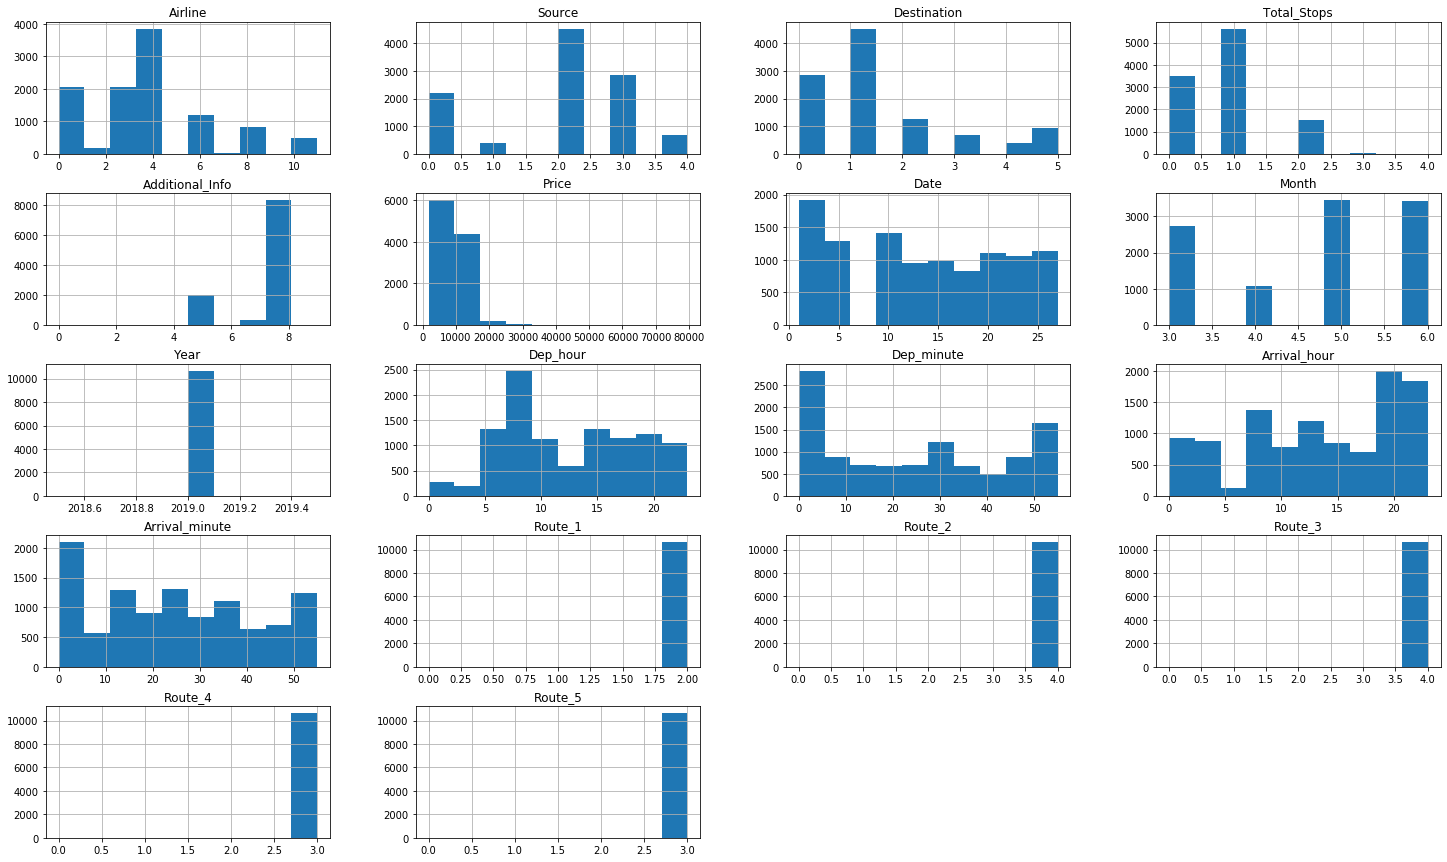

In [40]:
train_df.hist(figsize=(25,15))

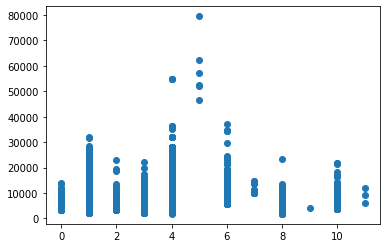

In [41]:
plt.scatter(train_df['Airline'],train_df['Price'])

In [42]:
import seaborn as sns

<Figure size 1080x432 with 0 Axes>

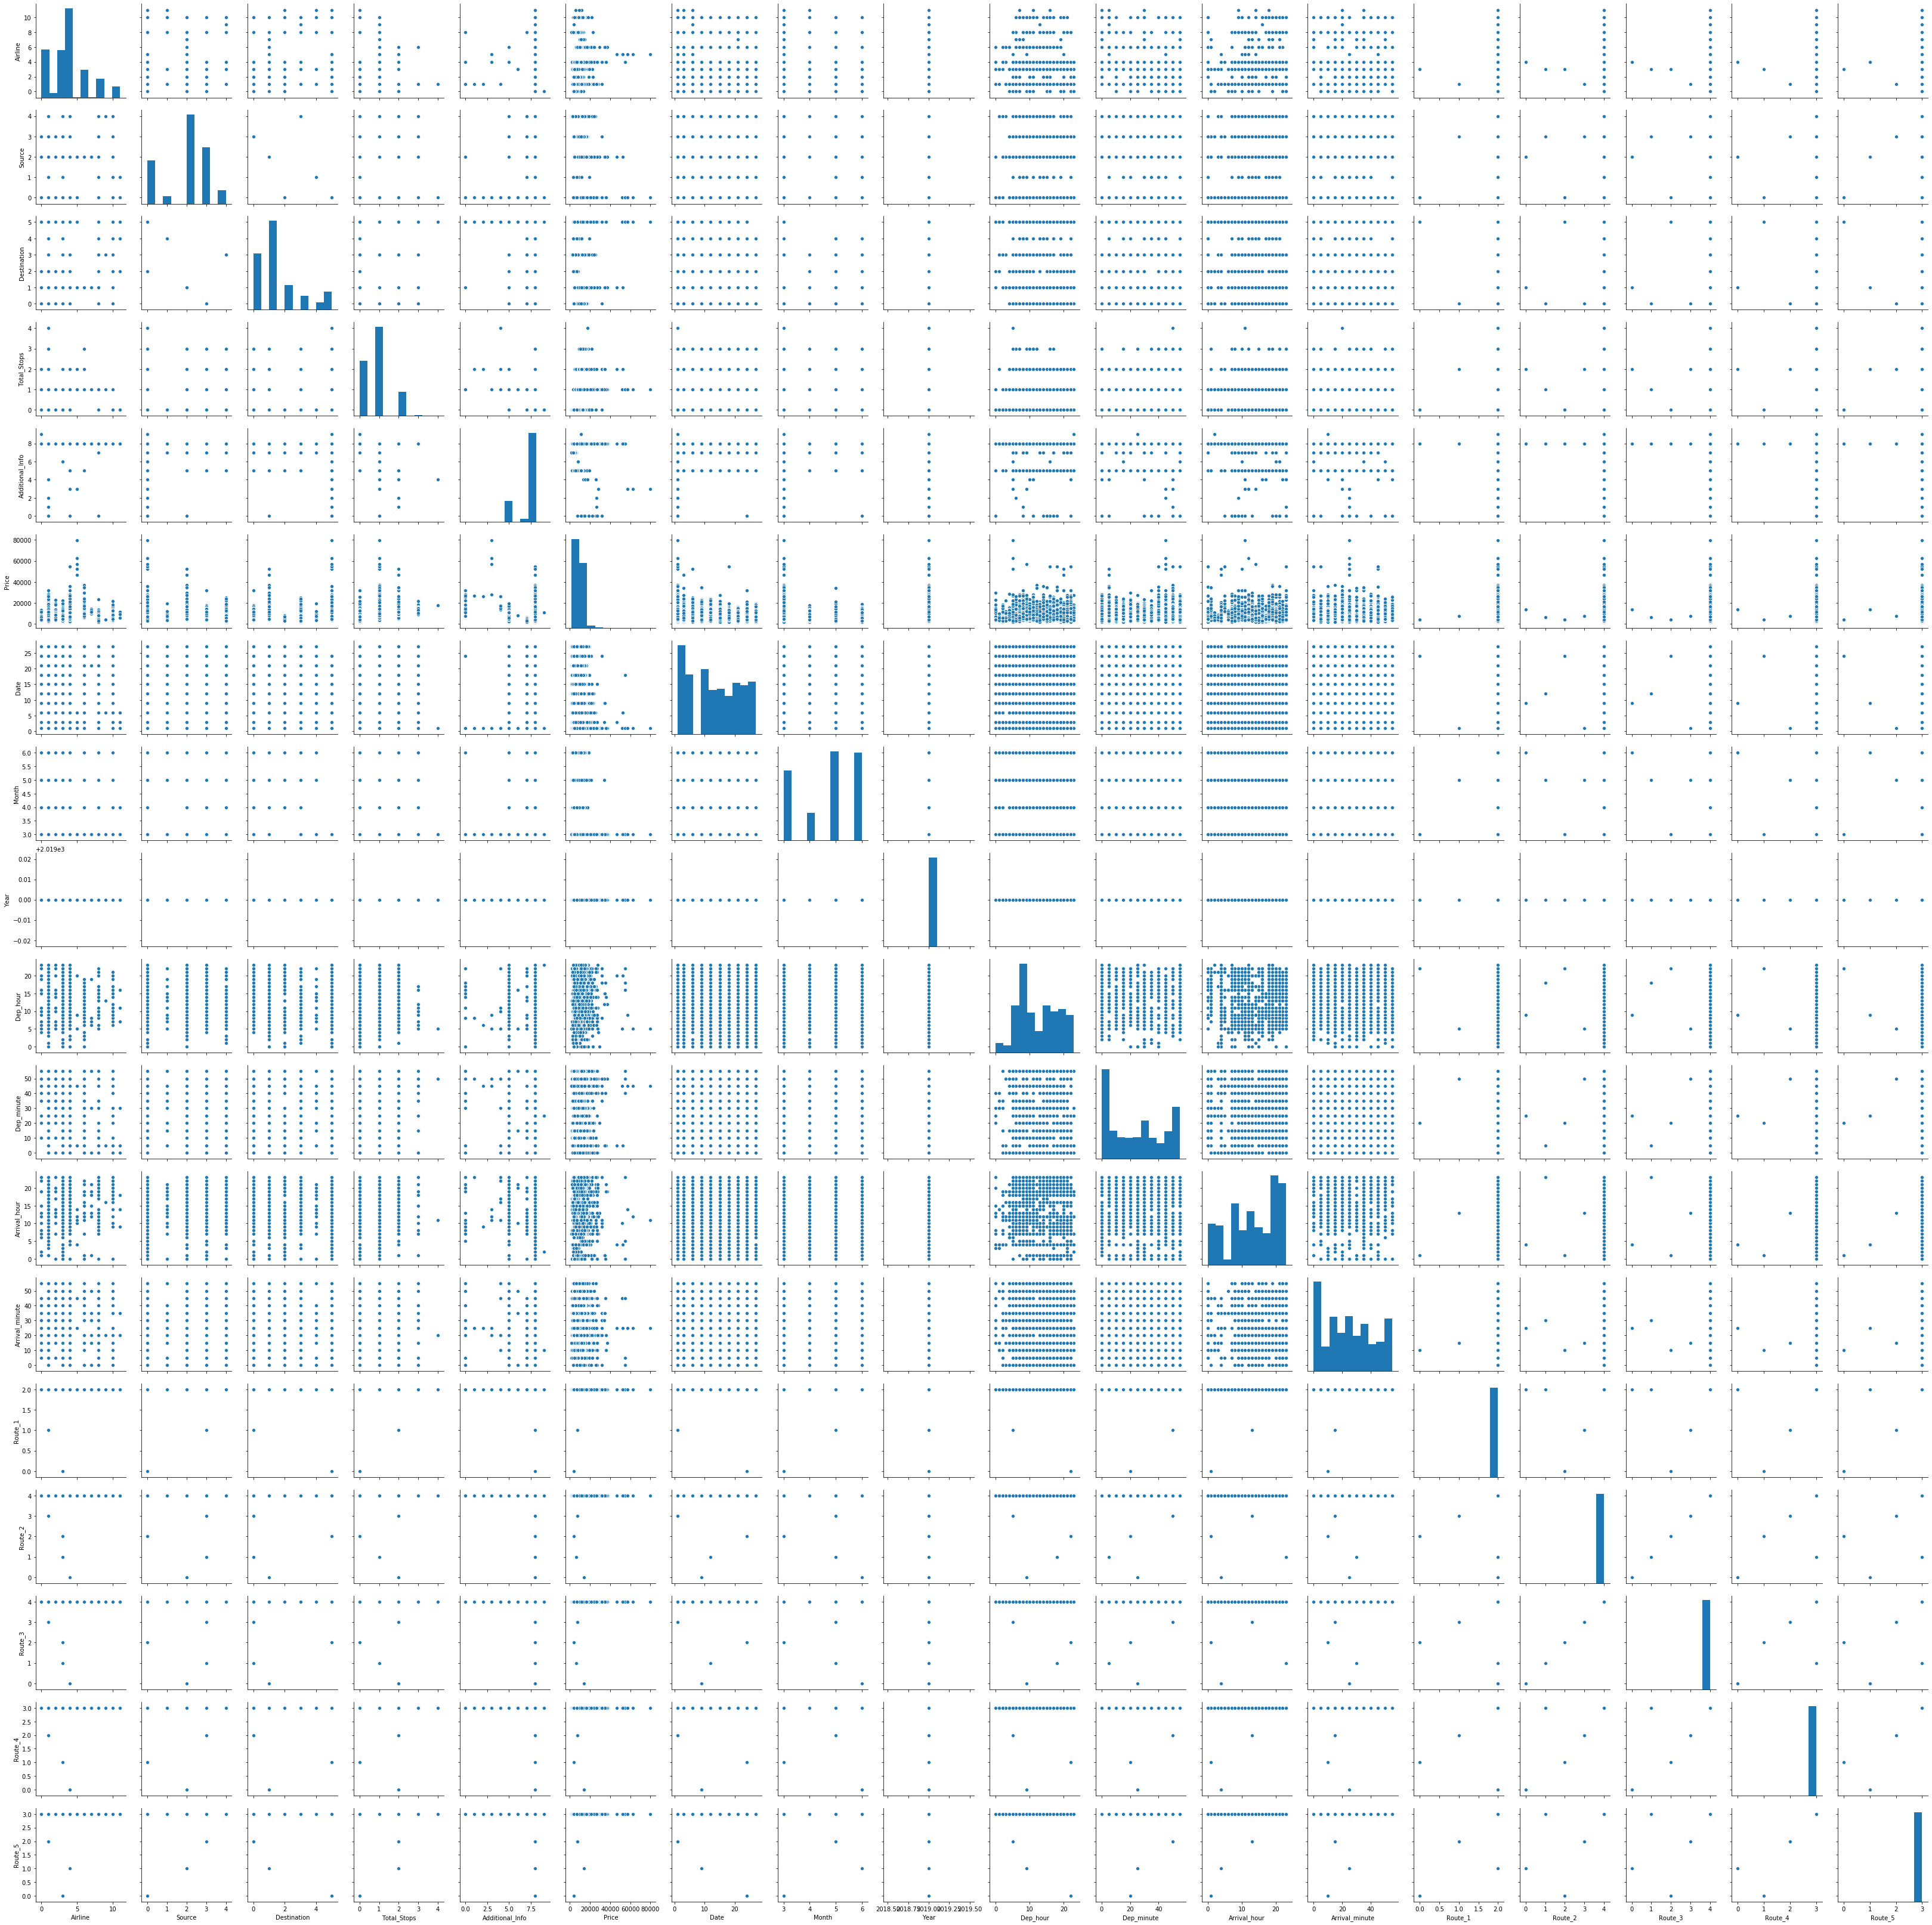

<Figure size 1080x432 with 0 Axes>

In [43]:
sns.pairplot(train_df)
plt.figure(figsize=(15,6))

### Model Implementation

In [44]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [45]:
X = train_df.drop('Price',axis=1)
y= train_df['Price']

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size =0.25,random_state=101)

In [47]:
linearReg = LinearRegression()
logisticReg = LogisticRegression()

In [48]:
# linear_model = linearReg.fit(xtrain,ytrain)

In [49]:
# logistic_model = logisticReg.fit(xtrain,ytrain)

In [50]:
# linear_model.score(xtest,ytest)  # very less score 

0.42848817127346606

In [51]:
# logistic_model.score(xtest,ytest) #very less score

0.34631224260576565

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

C:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Us

In [53]:
decision_tree = DecisionTreeRegressor()
random_forest =  RandomForestRegressor()

In [54]:
Dtree_model = decision_tree.fit(xtrain,ytrain)

In [55]:
Dtree_model.score(xtest,ytest)

0.8466168530554582

In [56]:
Rforest_model = random_forest.fit(xtrain,ytrain)

In [57]:
Rforest_model.score(xtest,ytest)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.8991715875994865

In [58]:
Dtree_model.criterion

'mse'

In [59]:
Dtree_model.decision_path(xtrain)

<8011x8445 sparse matrix of type '<class 'numpy.int64'>'
	with 127112 stored elements in Compressed Sparse Row format>

In [60]:
imp_Dtree_model= pd.DataFrame(Dtree_model.feature_importances_*100,index=X.columns,columns=['Feature Importance'])

In [61]:
imp_Dtree_model

,Feature Importance
Airline,17.776712
Source,1.016010
Destination,3.700767
Total_Stops,43.249458
Additional_Info,8.381094
Date,9.267118
Month,4.576580
Year,0.000000
Dep_hour,3.572819
Dep_minute,3.315368


In [62]:
X2 = train_df.drop(['Year','Route_1','Route_2','Route_3','Route_4','Route_5','Price'],axis=1)
y2 = train_df['Price']
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size =0.25,random_state=101)
Dtree_model2 = decision_tree.fit(xtrain2,ytrain2)
Rforest_model2 = random_forest.fit(xtrain2,ytrain2)

In [63]:
round(Dtree_model2.score(xtest2,ytest2)*100,2)

86.32

In [64]:
round(Rforest_model.score(xtest2,ytest2)*100,2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


89.84

In [65]:
imp_Dtree_model2= pd.DataFrame(Dtree_model2.feature_importances_*100,index=X2.columns,columns=['Feature Importance'])
imp_Dtree_model2

,Feature Importance
Airline,17.451831
Source,1.689841
Destination,2.938316
Total_Stops,43.183860
Additional_Info,8.377360
Date,9.285235
Month,4.556279
Dep_hour,3.181958
Dep_minute,3.548765
Arrival_hour,3.317849


In [66]:
Rforest_model2.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state')

In [67]:
Rforest_model2.criterion

'mse'

In [68]:
Rforest_model2.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1030169980, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=947701149, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2,

In [69]:
Dtree_model2.criterion

'mse'

In [70]:
Dtree_model3 = DecisionTreeRegressor(criterion='mae').fit(xtrain2,ytrain2)
Dtree_model3.score(xtest2,ytest2)*100

82.01762860340679

In [71]:
scores = []
for i in range(10,250, 10):
    Rforest_model3 = RandomForestRegressor(n_estimators=i,).fit(xtrain2, ytrain2)
    scores.append(round(Rforest_model3.score(xtest2, ytest2)*100,2))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

In [72]:
scores

[89.88,
 89.28,
 89.86,
 90.21,
 90.32,
 89.91,
 90.54,
 90.31,
 90.28,
 90.45,
 90.47,
 90.18,
 90.32,
 90.35,
 90.34,
 90.39,
 90.44,
 90.38,
 90.37,
 90.33,
 90.37,
 90.35,
 90.28,
 90.5]

0

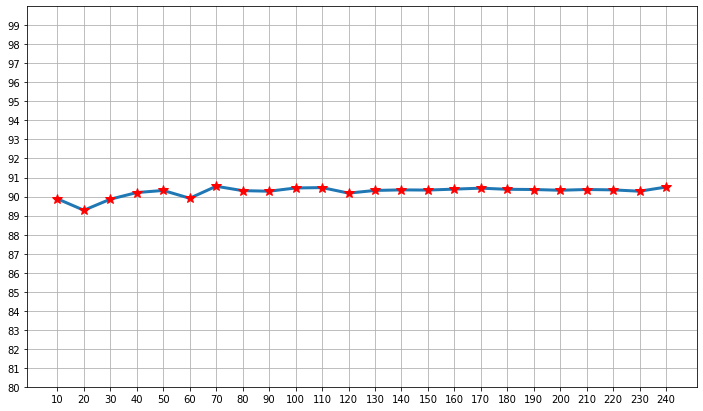

In [73]:
plt.figure(figsize=(12,7))
plt.plot(range(10,250, 10),scores,lw=3,marker='*',markersize=10,markerfacecolor='r',markeredgecolor='r')
plt.grid()
plt.ylim([80,100])
plt.yticks(range(80,100, 1))
plt.xticks(range(10,250, 10))
0

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
criterions = ['mse','mae']
# n_est = 
min_split = [4,6,8,10,14,18,20]

params = {'criterion':criterions,'min_samples_split':min_split}

In [76]:
dt_g_model = GridSearchCV(DecisionTreeRegressor(),param_grid=params,verbose=3)
dt_g_model.fit(xtrain2,ytrain2)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] criterion=mse, min_samples_split=4 ..............................
[CV] .. criterion=mse, min_samples_split=4, score=0.808, total=   0.0s
[CV] criterion=mse, min_samples_split=4 ..............................
[CV] .. criterion=mse, min_samples_split=4, score=0.737, total=   0.0s
[CV] criterion=mse, min_samples_split=4 ..............................
[CV] .. criterion=mse, min_samples_split=4, score=0.775, total=   0.0s
[CV] criterion=mse, min_samples_split=6 ..............................
[CV] .. criterion=mse, min_samples_split=6, score=0.827, total=   0.0s
[CV] criterion=mse, min_samples_split=6 ..............................
[CV] .. criterion=mse, min_samples_split=6, score=0.759, total=   0.0s
[CV] criterion=mse, min_samples_split=6 ..............................
[CV] .. criterion=mse, min_samples_split=6, score=0.787, total=   0.0s
[CV] criterion=mse, min_samples_split=8 ..............................
[CV] .. criterio

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for


[CV] criterion=mse, min_samples_split=14 .............................
[CV] . criterion=mse, min_samples_split=14, score=0.839, total=   0.0s
[CV] criterion=mse, min_samples_split=14 .............................
[CV] . criterion=mse, min_samples_split=14, score=0.792, total=   0.0s
[CV] criterion=mse, min_samples_split=14 .............................
[CV] . criterion=mse, min_samples_split=14, score=0.789, total=   0.0s
[CV] criterion=mse, min_samples_split=18 .............................
[CV] . criterion=mse, min_samples_split=18, score=0.838, total=   0.0s
[CV] criterion=mse, min_samples_split=18 .............................
[CV] . criterion=mse, min_samples_split=18, score=0.795, total=   0.0s
[CV] criterion=mse, min_samples_split=18 .............................
[CV] . criterion=mse, min_samples_split=18, score=0.795, total=   0.0s
[CV] criterion=mse, min_samples_split=20 .............................
[CV] . criterion=mse, min_samples_split=20, score=0.834, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   17.2s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [4, 6, 8, 10, 14, 18, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [77]:
dt_g_model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=18, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [78]:
dt_g_model.best_params_

{'criterion': 'mse', 'min_samples_split': 18}

In [79]:
dt_g_model.best_estimator_.score(xtest2,ytest2)

0.8587074625052016

In [80]:
Dtree_model_best_view = DecisionTreeRegressor(criterion= 'mse', min_samples_split = 18,random_state=101).fit(xtrain2,ytrain2)
Dtree_model_best_view.score(xtest2,ytest2)*100

85.85090027801927

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
criterions = ['mse','mae']
n_est = list(range(10,201,10))
min_split = [2, 5, 10, 15, 100]
# best_feature = ['sqrt','auto']
params = {'criterion' : criterions,'n_estimators':n_est,'min_samples_split':min_split}

In [83]:
rf_g_model= RandomizedSearchCV(RandomForestRegressor(),param_distributions=params,verbose=5)

In [84]:
rf_g_model.fit(xtrain2,ytrain2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=70, min_samples_split=10, criterion=mse ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for

[CV]  n_estimators=70, min_samples_split=10, criterion=mse, score=0.876, total=   0.6s
[CV] n_estimators=70, min_samples_split=10, criterion=mse ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=10, criterion=mse, score=0.830, total=   0.6s
[CV] n_estimators=70, min_samples_split=10, criterion=mse ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=10, criterion=mse, score=0.829, total=   0.7s
[CV] n_estimators=190, min_samples_split=5, criterion=mse ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=190, min_samples_split=5, criterion=mse, score=0.881, total=   2.0s
[CV] n_estimators=190, min_samples_split=5, criterion=mse ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=190, min_samples_split=5, criterion=mse, score=0.832, total=   1.9s
[CV] n_estimators=190, min_samples_split=5, criterion=mse ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=190, min_samples_split=5, criterion=mse, score=0.833, total=   1.9s
[CV] n_estimators=90, min_samples_split=2, criterion=mse .............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=90, min_samples_split=2, criterion=mse, score=0.879, total=   1.0s
[CV] n_estimators=90, min_samples_split=2, criterion=mse .............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=90, min_samples_split=2, criterion=mse, score=0.824, total=   1.0s
[CV] n_estimators=90, min_samples_split=2, criterion=mse .............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=90, min_samples_split=2, criterion=mse, score=0.828, total=   1.0s
[CV] n_estimators=150, min_samples_split=10, criterion=mse ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=150, min_samples_split=10, criterion=mse, score=0.874, total=   1.3s
[CV] n_estimators=150, min_samples_split=10, criterion=mse ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=150, min_samples_split=10, criterion=mse, score=0.828, total=   1.3s
[CV] n_estimators=150, min_samples_split=10, criterion=mse ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=150, min_samples_split=10, criterion=mse, score=0.833, total=   1.3s
[CV] n_estimators=50, min_samples_split=100, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=50, min_samples_split=100, criterion=mae, score=0.756, total=  15.0s
[CV] n_estimators=50, min_samples_split=100, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=50, min_samples_split=100, criterion=mae, score=0.713, total=  14.9s
[CV] n_estimators=50, min_samples_split=100, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=50, min_samples_split=100, criterion=mae, score=0.720, total=  13.8s
[CV] n_estimators=200, min_samples_split=100, criterion=mse ..........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=200, min_samples_split=100, criterion=mse, score=0.786, total=   1.1s
[CV] n_estimators=200, min_samples_split=100, criterion=mse ..........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=200, min_samples_split=100, criterion=mse, score=0.718, total=   1.2s
[CV] n_estimators=200, min_samples_split=100, criterion=mse ..........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=200, min_samples_split=100, criterion=mse, score=0.748, total=   1.1s
[CV] n_estimators=130, min_samples_split=15, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=130, min_samples_split=15, criterion=mae, score=0.862, total=  42.3s
[CV] n_estimators=130, min_samples_split=15, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=130, min_samples_split=15, criterion=mae, score=0.813, total=  40.8s
[CV] n_estimators=130, min_samples_split=15, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=130, min_samples_split=15, criterion=mae, score=0.809, total=  41.6s
[CV] n_estimators=130, min_samples_split=10, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=130, min_samples_split=10, criterion=mae, score=0.868, total=  46.2s
[CV] n_estimators=130, min_samples_split=10, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=130, min_samples_split=10, criterion=mae, score=0.819, total=  41.1s
[CV] n_estimators=130, min_samples_split=10, criterion=mae ...........


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=130, min_samples_split=10, criterion=mae, score=0.814, total=  40.5s
[CV] n_estimators=20, min_samples_split=5, criterion=mae .............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=20, min_samples_split=5, criterion=mae, score=0.863, total=   7.2s
[CV] n_estimators=20, min_samples_split=5, criterion=mae .............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=20, min_samples_split=5, criterion=mae, score=0.818, total=   6.1s
[CV] n_estimators=20, min_samples_split=5, criterion=mae .............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=20, min_samples_split=5, criterion=mae, score=0.804, total=   7.4s
[CV] n_estimators=160, min_samples_split=2, criterion=mae ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=160, min_samples_split=2, criterion=mae, score=0.871, total=  52.7s
[CV] n_estimators=160, min_samples_split=2, criterion=mae ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[CV]  n_estimators=160, min_samples_split=2, criterion=mae, score=0.813, total=  51.2s
[CV] n_estimators=160, min_samples_split=2, criterion=mae ............


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.2min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the preci

[CV]  n_estimators=160, min_samples_split=2, criterion=mae, score=0.825, total=  50.7s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st

In [85]:
rf_g_model.best_params_

{'n_estimators': 190, 'min_samples_split': 5, 'criterion': 'mse'}

In [90]:
rf_g_model.best_params_

{'n_estimators': 190, 'min_samples_split': 5, 'criterion': 'mse'}

In [97]:
rf_g_model_best_view =RandomForestRegressor(n_estimators= 190, min_samples_split= 5, criterion= 'mse',random_state=101).fit(xtrain2,ytrain2)

In [98]:
rf_g_model_best_view.score(xtest2,ytest2)*100

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


89.91390217241988

In [99]:
final_model=rf_g_model_best_view

In [100]:
pd.to_pickle(final_model,'Flight_Price_Predictor')